### Import Package

In [ ]:
#iImport Fuzzy
!pip install rulekit

In [ ]:
# after installation
!python -m rulekit download_jar

Fetching latest RuleKit release version:  v1.5.2
Old RuleKit jar file/files (['rulekit-1.5.2-all.jar']) detected,do you want to remove it/them? Type "yes" or "no"
Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/rulekit/__main__.py", line 70, in <module>
    _main()
  File "/usr/local/lib/python3.10/dist-packages/rulekit/__main__.py", line 61, in _main
    _download_rulekit_jar()
  File "/usr/local/lib/python3.10/dist-packages/rulekit/__main__.py", line 38, in _download_rulekit_jar
    user_input: str = input(
KeyboardInterrupt
^C


In [ ]:
import pandas as pd
import numpy as np
from rulekit import RuleKit
from rulekit.classification import RuleClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


### Import Dataset

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878)

# data (as pandas dataframes)
X = cirrhosis_patient_survival_prediction.data.features
y = cirrhosis_patient_survival_prediction.data.targets

In [ ]:
import pandas as pd
df = pd.DataFrame(X)
df

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,4.0
1,D-penicillamine,20617,F,N,Y,Y,N,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3.0
2,D-penicillamine,25594,M,N,N,N,S,1.4,176,3.48,210,516.0,96.10,55,151,12.0,4.0
3,D-penicillamine,19994,F,N,Y,Y,S,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4.0
4,Placebo,13918,F,N,Y,Y,N,3.4,279,3.53,143,671.0,113.15,72,136,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174,10.9,3.0
414,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180,11.2,4.0
415,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143,9.9,3.0
416,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269,10.4,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Drug           313 non-null    object 
 1   Age            418 non-null    int64  
 2   Sex            418 non-null    object 
 3   Ascites        313 non-null    object 
 4   Hepatomegaly   313 non-null    object 
 5   Spiders        313 non-null    object 
 6   Edema          418 non-null    object 
 7   Bilirubin      418 non-null    float64
 8   Cholesterol    312 non-null    object 
 9   Albumin        418 non-null    float64
 10  Copper         312 non-null    object 
 11  Alk_Phos       312 non-null    float64
 12  SGOT           312 non-null    float64
 13  Tryglicerides  312 non-null    object 
 14  Platelets      411 non-null    object 
 15  Prothrombin    416 non-null    float64
 16  Stage          412 non-null    float64
dtypes: float64(6), int64(1), object(10)
memory usage: 55.6

In [ ]:
# Mengambil kolom dengan tipe data 'object' (kategorikal)
kolom_kategorikal = X.select_dtypes(include=['object'])

# Menampilkan nilai unik dari setiap kolom kategorikal
for kolom in kolom_kategorikal:
    nilai_unik = X[kolom].unique()
    print(f"Kolom '{kolom}' adalah kategorikal, nilai uniknya: {nilai_unik}")


Kolom 'Drug' adalah kategorikal, nilai uniknya: ['D-penicillamine' 'Placebo' 'NaNN' nan]
Kolom 'Sex' adalah kategorikal, nilai uniknya: ['F' 'M']
Kolom 'Ascites' adalah kategorikal, nilai uniknya: ['Y' 'N' 'NaNN' nan]
Kolom 'Hepatomegaly' adalah kategorikal, nilai uniknya: ['Y' 'N' 'NaNN' nan]
Kolom 'Spiders' adalah kategorikal, nilai uniknya: ['Y' 'N' 'NaNN' nan]
Kolom 'Edema' adalah kategorikal, nilai uniknya: ['Y' 'N' 'S']
Kolom 'Cholesterol' adalah kategorikal, nilai uniknya: ['261' '302' '176' '244' '279' '248' '322' '280' '562' '200' '259' '236'
 '281' 'NaNN' '231' '204' '274' '178' '235' '374' '252' '271' '395' '456'
 '298' '1128' '175' '222' '370' '260' '296' '262' '210' '364' '314' '172'
 '334' '383' '282' '361' '299' '482' '316' '257' '276' '614' '288' '416'
 '498' '242' '329' '604' '216' '932' '373' '256' '427' '466' '174' '652'
 '258' '320' '132' '558' '674' '394' '436' '315' '247' '448' '472' '250'
 '263' '1600' '345' '408' '660' '325' '206' '353' '201' '420' '239' '460'
 

### Preprosess data
1. Drop Row with null value
2. Change miss data type -> object to numeric and vice versa
3. Flatten y agar sesuai dengan input untuk rulekit

In [ ]:
# Kolom yang ingin diubah menjadi numerik
kolom_numerik = ['Cholesterol', 'Copper', 'Tryglicerides', 'Platelets']

# Konversi kolom tertentu menjadi tipe data numerik
X[kolom_numerik] = X[kolom_numerik].apply(pd.to_numeric, errors='coerce')

# Menghapus baris yang memiliki nilai NaN di kolom tersebut
X.dropna(subset=kolom_numerik, inplace=True)
y = y.loc[X.index]

<ipython-input-31-8b27ee69e601>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[kolom_numerik] = X[kolom_numerik].apply(pd.to_numeric, errors='coerce')
<ipython-input-31-8b27ee69e601>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(subset=kolom_numerik, inplace=True)


In [ ]:
#merubah kolom stage dari float ke object
X['Stage']=X['Stage'].astype('int')
X['Stage']=X['Stage'].astype('object')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 311
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Drug           276 non-null    object 
 1   Age            276 non-null    int64  
 2   Sex            276 non-null    object 
 3   Ascites        276 non-null    object 
 4   Hepatomegaly   276 non-null    object 
 5   Spiders        276 non-null    object 
 6   Edema          276 non-null    object 
 7   Bilirubin      276 non-null    float64
 8   Cholesterol    276 non-null    float64
 9   Albumin        276 non-null    float64
 10  Copper         276 non-null    float64
 11  Alk_Phos       276 non-null    float64
 12  SGOT           276 non-null    float64
 13  Tryglicerides  276 non-null    float64
 14  Platelets      276 non-null    float64
 15  Prothrombin    276 non-null    float64
 16  Stage          276 non-null    object 
dtypes: float64(9), int64(1), object(7)
memory usage: 38.8+

<ipython-input-32-246353642516>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Stage']=X['Stage'].astype('int')
<ipython-input-32-246353642516>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Stage']=X['Stage'].astype('object')


In [ ]:
X.shape

(276, 17)

In [ ]:
y.shape

(276, 1)

In [ ]:
# Mengambil kolom dengan tipe data 'object' (kategorikal)
kolom_kategorikal = X.select_dtypes(include=['object'])

# Menampilkan nilai unik dari setiap kolom kategorikal
for kolom in kolom_kategorikal:
    nilai_unik = X[kolom].unique()
    print(f"Kolom '{kolom}' adalah kategorikal, nilai uniknya: {nilai_unik}")


Kolom 'Drug' adalah kategorikal, nilai uniknya: ['D-penicillamine' 'Placebo']
Kolom 'Sex' adalah kategorikal, nilai uniknya: ['F' 'M']
Kolom 'Ascites' adalah kategorikal, nilai uniknya: ['Y' 'N']
Kolom 'Hepatomegaly' adalah kategorikal, nilai uniknya: ['Y' 'N']
Kolom 'Spiders' adalah kategorikal, nilai uniknya: ['Y' 'N']
Kolom 'Edema' adalah kategorikal, nilai uniknya: ['Y' 'N' 'S']
Kolom 'Stage' adalah kategorikal, nilai uniknya: [4 3 2 1]


In [ ]:
import numpy as np
y = np.array(y)
y = y.flatten()
print(y)

['D' 'C' 'D' 'D' 'CL' 'C' 'D' 'D' 'D' 'D' 'D' 'C' 'D' 'C' 'D' 'D' 'C' 'D'
 'C' 'D' 'D' 'D' 'C' 'D' 'D' 'D' 'C' 'D' 'D' 'C' 'D' 'C' 'D' 'C' 'D' 'D'
 'D' 'C' 'D' 'D' 'C' 'C' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'C' 'C' 'D' 'D'
 'D' 'C' 'D' 'D' 'C' 'D' 'C' 'C' 'C' 'D' 'D' 'D' 'D' 'D' 'C' 'D' 'D' 'D'
 'C' 'C' 'D' 'D' 'D' 'C' 'D' 'D' 'D' 'D' 'C' 'D' 'D' 'C' 'C' 'D' 'C' 'C'
 'D' 'D' 'CL' 'C' 'D' 'C' 'D' 'CL' 'D' 'D' 'D' 'C' 'C' 'D' 'D' 'D' 'CL'
 'D' 'C' 'C' 'CL' 'C' 'D' 'D' 'C' 'D' 'C' 'C' 'C' 'C' 'D' 'C' 'C' 'C' 'D'
 'D' 'D' 'C' 'C' 'D' 'D' 'C' 'D' 'C' 'D' 'C' 'D' 'C' 'CL' 'D' 'C' 'C' 'D'
 'D' 'D' 'C' 'D' 'D' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'CL' 'D' 'C' 'D' 'D'
 'C' 'C' 'D' 'C' 'D' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'D' 'C' 'D'
 'C' 'C' 'C' 'C' 'D' 'D' 'D' 'C' 'D' 'C' 'D' 'D' 'C' 'C' 'C' 'D' 'C' 'D'
 'C' 'D' 'C' 'C' 'C' 'C' 'C' 'C' 'D' 'C' 'CL' 'C' 'D' 'D' 'C' 'CL' 'CL'
 'C' 'C' 'C' 'C' 'C' 'C' 'CL' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'CL' 'CL' 'CL'
 'C' 'D' 'D' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 

### Menjalankan Rulekit

In [ ]:
RuleKit.init()

clf = RuleClassifier()
clf.fit(X, y)
ruleset = clf.model
for rule in ruleset.rules:
  print(rule)

IF Tryglicerides = <49.50, 350) AND Prothrombin = <9.65, inf) AND Bilirubin = <1.95, inf) AND Age = <16138, 26739.50) THEN label = {D}
IF Tryglicerides = <49.50, inf) AND Prothrombin = <9.65, inf) AND Albumin = (-inf, 4.34) AND Bilirubin = <1.95, inf) AND Platelets = (-inf, 434) AND Age = <15114, 26739.50) AND SGOT = (-inf, 284.28) THEN label = {D}
IF Prothrombin = <10.25, inf) AND Albumin = (-inf, 4.14) AND Bilirubin = <1.95, inf) AND Copper = <33, inf) AND Age = <12992.50, 26739.50) AND SGOT = (-inf, 284.28) THEN label = {D}
IF Tryglicerides = <47, inf) AND Prothrombin = <9.55, inf) AND Bilirubin = <1.75, inf) AND Copper = <47, inf) AND Age = <12992.50, 26739.50) THEN label = {D}
IF Tryglicerides = <49.50, 350) AND Prothrombin = <9.85, inf) AND Bilirubin = <1.35, inf) AND Age = <16138, 28334) THEN label = {D}
IF Tryglicerides = <46.50, inf) AND Prothrombin = <10.05, inf) AND Bilirubin = <1.25, inf) AND Copper = <49, inf) AND Platelets = (-inf, 448.50) AND Age = <12173.50, 26739.50) A

### Prediksi Dataset dengan Rule yang sudah dibuat

In [ ]:
prediction = clf.predict(X)
print(prediction)

['D' 'C' 'D' 'D' 'D' 'C' 'D' 'D' 'D' 'C' 'D' 'C' 'D' 'C' 'D' 'D' 'C' 'D'
 'C' 'D' 'D' 'D' 'C' 'D' 'D' 'D' 'C' 'D' 'D' 'C' 'C' 'C' 'D' 'C' 'D' 'D'
 'D' 'C' 'D' 'D' 'C' 'D' 'C' 'C' 'D' 'D' 'D' 'D' 'D' 'C' 'C' 'C' 'D' 'D'
 'D' 'C' 'C' 'D' 'C' 'D' 'C' 'C' 'C' 'D' 'D' 'D' 'D' 'D' 'C' 'D' 'D' 'D'
 'C' 'C' 'D' 'D' 'D' 'C' 'D' 'D' 'D' 'D' 'C' 'D' 'D' 'C' 'C' 'D' 'C' 'C'
 'D' 'C' 'C' 'C' 'C' 'C' 'C' 'CL' 'D' 'D' 'D' 'C' 'C' 'D' 'D' 'D' 'CL' 'D'
 'C' 'C' 'C' 'C' 'D' 'D' 'C' 'C' 'C' 'C' 'C' 'C' 'D' 'C' 'C' 'C' 'C' 'D'
 'D' 'C' 'C' 'C' 'D' 'C' 'D' 'C' 'D' 'C' 'D' 'C' 'CL' 'D' 'C' 'C' 'D' 'C'
 'D' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'D' 'C' 'D' 'D' 'C'
 'C' 'D' 'C' 'D' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'D' 'C'
 'C' 'C' 'C' 'D' 'D' 'D' 'C' 'D' 'C' 'D' 'D' 'C' 'C' 'C' 'D' 'C' 'D' 'C'
 'D' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'CL' 'C' 'D' 'D' 'C' 'CL' 'CL' 'C'
 'C' 'C' 'C' 'C' 'C' 'CL' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'D' 'D' 'C' 'D'
 'D' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'

In [ ]:
#Cek akurasi
accuracy = accuracy_score(y, prediction)
print(accuracy)

0.8840579710144928


In [ ]:
# Menghitung F1 score
f1 = f1_score(y, prediction, average='weighted')
print(f1)

0.8796487165269578


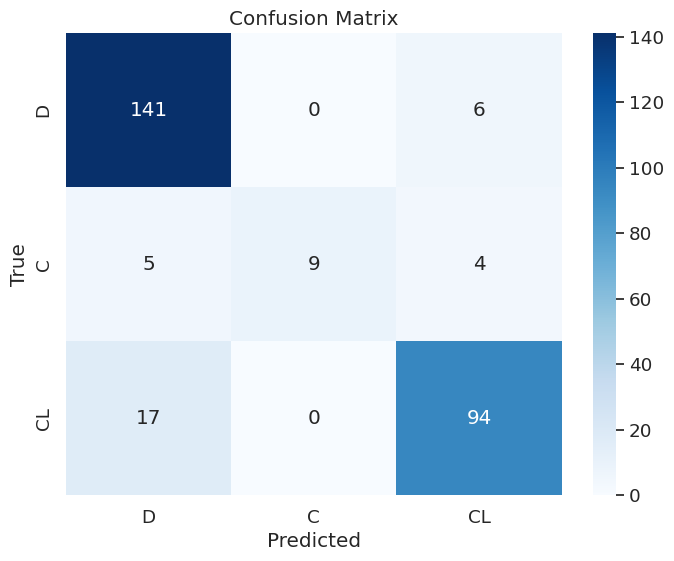

In [ ]:
# Membuat confusion matrix
cm = confusion_matrix(y, prediction)

# Memberi label untuk confusion matrix
labels = ['D', 'C', 'CL']

# Membuat heatmap confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur ukuran font
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Simulasi sistem dengan rule yang telah dibuat

In [ ]:
data = []
pasien = input("nama pasien: ")
columns = [
    'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema',
    'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
    'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'
]

categorical_column = {
    'Drug': {'D-PENICILLAMINE', 'Placebo'},
    'Sex': {'F', 'M'},
    'Ascites': {'N', 'Y'},
    'Hepatomegaly': {'N', 'Y'},
    'Spiders': {'N', 'Y'},
    'Edema': {'N', 'S', 'Y'},
    'Stage' : {'4','3','2','1'}
}

for column in columns:
    if column in categorical_column:
        print(f"Masukkan data '{column}' dari opsi: {', '.join(categorical_column[column])}")
    else:
        print(f"Masukkan data '{column}':")
    user_input_data = input()

    if column in categorical_column and user_input_data not in categorical_column[column]:
        print("Input tidak valid. Coba lagi.")
        user_input_data = input()

    data.append(user_input_data)

data=[data]

print("Data yang telah diinputkan:")
print(data)



nama pasien: andi
Masukkan data 'Drug' dari opsi: Placebo, D-PENICILLAMINE
Placebo
Masukkan data 'Age':
20000
Masukkan data 'Sex' dari opsi: M, F
M
Masukkan data 'Ascites' dari opsi: N, Y
N
Masukkan data 'Hepatomegaly' dari opsi: N, Y
N
Masukkan data 'Spiders' dari opsi: N, Y
Y
Masukkan data 'Edema' dari opsi: N, S, Y
N
Masukkan data 'Bilirubin':
453
Masukkan data 'Cholesterol':
546
Masukkan data 'Albumin':
345
Masukkan data 'Copper':
456
Masukkan data 'Alk_Phos':
234
Masukkan data 'SGOT':
456
Masukkan data 'Tryglicerides':
345
Masukkan data 'Platelets':
456
Masukkan data 'Prothrombin':
345
Masukkan data 'Stage' dari opsi: 3, 4, 1, 2
4
Data yang telah diinputkan:
[['Placebo', '20000', 'M', 'N', 'N', 'Y', 'N', '453', '546', '345', '456', '234', '456', '345', '456', '345', '4']]


In [ ]:
predict = clf.predict(data)
if predict == 'C':
  kelas = 'Cencored'
elif predict == 'CL':
  kelas = 'Cencored due to Liver Transplantation'
elif predict == 'D':
  kelas = 'Death'

print(f"Pasien {pasien} termasuk ke dalam kelas {kelas}")

Pasien andi termasuk ke dalam kelas Cencored
